In [1]:
import pandas as pd
from pandas import Series, DataFrame
data = pd.read_csv('covid19case_02_08.csv')
data = data.iloc[:, :11]
data

,OBJECTID,Case_no_,Date_of_laboratory_confirmation,Date_of_onset,Gender,Age,Name_of_hospital_admitted,Hospitalised_Discharged_Decease,HK_Non_HK_resident,Case_classification,Confirmed
0,3539,3397,01/08/2020,29/07/2020,F,36,NaN,To be provided,HK Resident,Epidemiologically linked with local case,Confirmed
1,3538,3396,01/08/2020,Asymptomatic,M,72,NaN,To be provided,HK Resident,Local case,Confirmed
2,3537,3395,01/08/2020,18/07/2020,M,68,NaN,To be provided,HK Resident,Local case,Confirmed
3,3536,3394,01/08/2020,22/07/2020,M,66,NaN,To be provided,HK Resident,Local case,Confirmed
4,3535,3393,01/08/2020,28/07/2020,M,66,NaN,To be provided,HK Resident,Local case,Confirmed
...,...,...,...,...,...,...,...,...,...,...,...
3392,147,5,24/01/2020,23/01/2020,M,63,NaN,Discharged,Non-HK resident,Imported case,Confirmed
3393,146,4,24/01/2020,23/01/2020,F,62,NaN,Discharged,Non-HK resident,Imported case,Confirmed
3394,145,3,24/01/2020,20/01/2020,F,62,NaN,Discharged,Non-HK resident,Imported case,Confirmed
3395,144,2,23/01/2020,18/01/2020,M,56,NaN,Discharged,HK resident,Imported case,Confirmed


# Data Visualisation

In [2]:
x = data['Gender'].value_counts()
print(x)

F    1707
M    1690
Name: Gender, dtype: int64


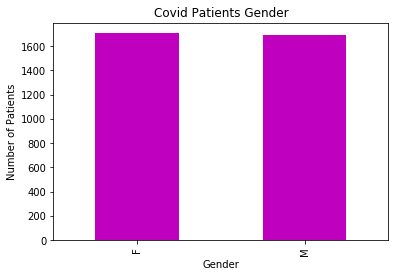

In [3]:
import matplotlib.pyplot as plt
plt.xlabel('Gender')
plt.ylabel('Number of Patients')
plt.title('Covid Patients Gender')
plt.grid(True)

x.plot(kind='bar',color='m')


In [4]:
y = data['Case_classification'].value_counts()
print(y)

Epidemiologically linked with local case             1290
Imported case                                        1045
Local case                                            867
Possibly local case                                   103
Epidemiologically linked with possibly local case      62
Epidemiologically linked with imported case            30
Name: Case_classification, dtype: int64


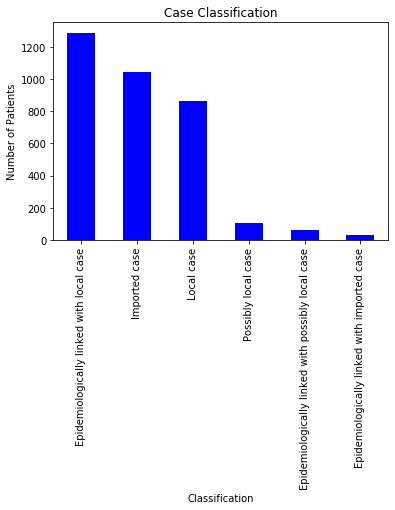

In [5]:
import matplotlib.pyplot as plt
plt.xlabel('Classification')
plt.ylabel('Number of Patients')
plt.title('Case Classification')
plt.xticks([i + 0.5 for i, _ in enumerate(y)], y)
plt.grid(True)

y.plot(kind='bar',color='b')

In [6]:
z = data['Age']
z.head()

0    36
1    72
2    68
3    66
4    66
Name: Age, dtype: int64

(array([ 90.,  89., 225., 330., 383., 357., 332., 310., 379., 349., 293.,
        102.,  75.,  55.,  28.]),
 array([ 0.        ,  6.46666667, 12.93333333, 19.4       , 25.86666667,
        32.33333333, 38.8       , 45.26666667, 51.73333333, 58.2       ,
        64.66666667, 71.13333333, 77.6       , 84.06666667, 90.53333333,
        97.        ]),
 <a list of 15 Patch objects>)

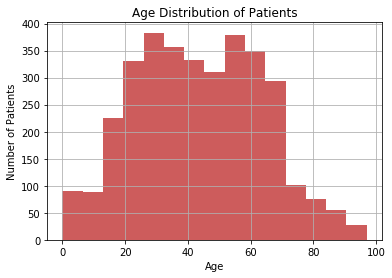

In [7]:
plt.xlabel('Age')
plt.ylabel('Number of Patients')
plt.title('Age Distribution of Patients')
plt.style.use('ggplot')
plt.grid(True)
plt.hist(z, color='indianred', bins = 15)

# Relationship of Data

In [8]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
import re

In [9]:
gender = data['Gender'].copy()
gender.head()

0    F
1    M
2    M
3    M
4    M
Name: Gender, dtype: object

In [10]:
gender.replace(['F'], 0, inplace = True)
gender.replace(['M'], 1, inplace = True)
gender

0       0
1       1
2       1
3       1
4       1
       ..
3392    1
3393    0
3394    0
3395    1
3396    1
Name: Gender, Length: 3397, dtype: int64

In [11]:
h = data['Case_classification'].value_counts()
h.head()

Epidemiologically linked with local case             1290
Imported case                                        1045
Local case                                            867
Possibly local case                                   103
Epidemiologically linked with possibly local case      62
Name: Case_classification, dtype: int64

In [12]:
case = data['Case_classification'].copy()
case.head()

0    Epidemiologically linked with local case
1                                  Local case
2                                  Local case
3                                  Local case
4                                  Local case
Name: Case_classification, dtype: object

In [13]:
case.replace('Local case', 0, inplace = True)
case.replace('Possibly local case', 1, inplace = True)
case.replace('Imported case', 2, inplace = True)
case.replace('Epidemiologically linked with local case', 3, inplace = True)
case.replace('Epidemiologically linked with possibly local case', 4, inplace = True)
case.replace('Epidemiologically linked with imported case', 5, inplace = True)
case.head()

0    3
1    0
2    0
3    0
4    0
Name: Case_classification, dtype: int64

In [14]:
case.value_counts()

3    1290
2    1045
0     867
1     103
4      62
5      30
Name: Case_classification, dtype: int64

In [15]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

      Gender  Case_classification  Age
0          0                    3   36
1          1                    0   72
2          1                    0   68
3          1                    0   66
4          1                    0   66
...      ...                  ...  ...
3392       1                    2   63
3393       0                    2   62
3394       0                    2   62
3395       1                    2   56
3396       1                    2   39

[3397 rows x 3 columns]
                       Gender  Case_classification       Age
Gender               1.000000            -0.012828 -0.027431
Case_classification -0.012828             1.000000 -0.093217
Age                 -0.027431            -0.093217  1.000000


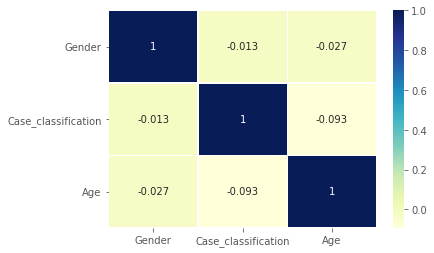

In [16]:
import seaborn as sns

reg = pd.concat([gender,case, data['Age']], axis=1)


print(reg)

corr = reg.corr()
print(corr)
sns.heatmap(corr, cmap='YlGnBu', annot=True,
    linewidths=.3, linecolor='white',
    xticklabels=corr.columns.values,
    yticklabels=corr.columns.values)

# Machine Learning

In [17]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
%matplotlib inline

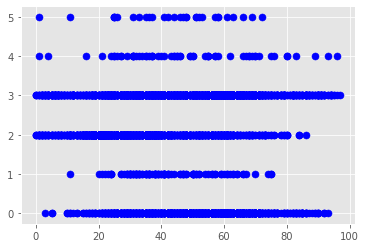

In [18]:
x1 = reg['Age']
y1 = reg['Case_classification']
plt.scatter(x1, y1, s = 50, c = 'b')
plt.show()

In [19]:
machine = reg[['Age', 'Case_classification']]
machine

,Age,Case_classification
0,36,3
1,72,0
2,68,0
3,66,0
4,66,0
...,...,...
3392,63,2
3393,62,2
3394,62,2
3395,56,2


In [20]:
from sklearn.cluster import KMeans
Kmean = KMeans(n_clusters=3)
Kmean.fit(machine)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [21]:
Kmean.cluster_centers_

array([[43.6090604 ,  1.82718121],
       [21.05013429,  2.07609669],
       [67.03216912,  1.80514706]])

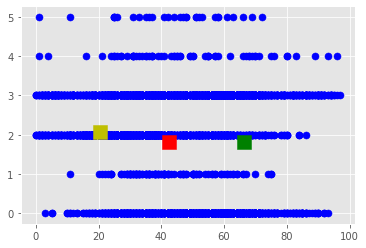

In [22]:
plt.scatter(x1, y1, s =50, c='b')
plt.scatter(66.48333333, 1.81666667, s=200, c='g', marker='s')
plt.scatter(20.48305085, 2.08097928, s=200, c='y', marker='s')
plt.scatter(42.5790795, 1.82718121, s=200, c='r', marker='s')
plt.show()

In [23]:
Kmean.labels_

array([0, 2, 2, ..., 2, 2, 0], dtype=int32)